In [30]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged_df = pd.merge(ride_df, city_df, how="left", on="city")
# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

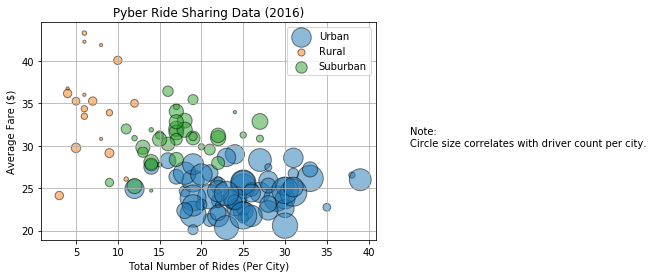

In [36]:
# Obtain the x and y coordinates for each of the three city types
city_urb = merged_df[merged_df["type"] == "Urban"].groupby([merged_df["city"]])
x_urb = city_urb["ride_id"].count()
y_urb = city_urb["fare"].mean()
s_urb = city_urb["driver_count"].mean()

city_rur = merged_df[merged_df["type"] == "Rural"].groupby([merged_df["city"]])
x_rur = city_rur["ride_id"].count()
y_rur = city_rur["fare"].mean()
s_rur = city_rur["driver_count"].mean()

city_sub = merged_df[merged_df["type"] == "Suburban"].groupby([merged_df["city"]])
x_sub = city_sub["ride_id"].count()
y_sub = city_sub["fare"].mean()
s_sub = city_sub["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urb, y_urb, label="Urban", s=s_urb*10, edgecolor="black", alpha=0.5)
plt.scatter(x_rur, y_rur, label="Rural", s=s_rur*10, edgecolor="black", alpha=0.5)
plt.scatter(x_sub, y_sub, label="Suburban", s=s_sub*10, edgecolor="black", alpha=0.5)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend()

# Incorporate a text label regarding circle size
plt.text(45,30, "Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("..\..\..\..\..\GitHub\matplotlib-homework\PyberRideSharingData.png")

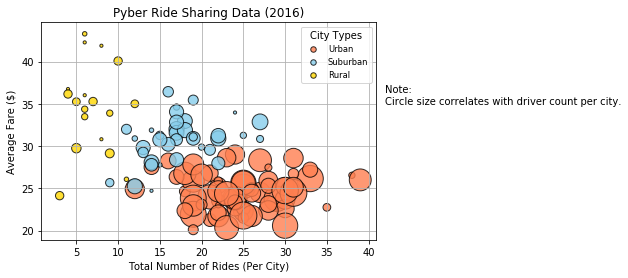

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

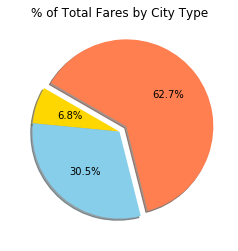

In [37]:
# Calculate Type Percents
group_type = merged_df.groupby(['type'])
total_fare = group_type['fare'].sum()

# Build Pie Chart
labels = ["Rural", "Urban", "Suburban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(total_fare, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("..\..\..\..\..\GitHub\matplotlib-homework\TotalFaresbyCityType.png")

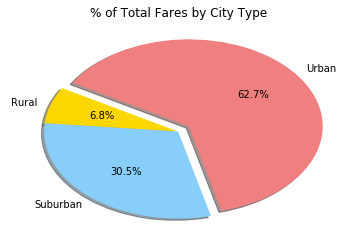

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

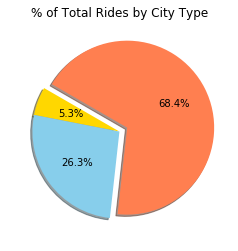

In [38]:
# Calculate Ride Percents
ride_count = group_type['ride_id'].count()

# Build Pie Chart
labels = ["Rural", "Urban", "Suburban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(ride_count, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("..\..\..\..\..\GitHub\matplotlib-homework\%ofTotalRidesbyCityType.png")

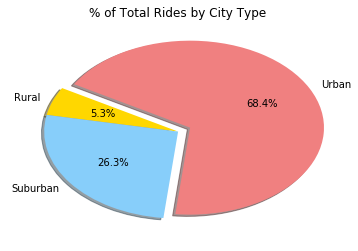

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

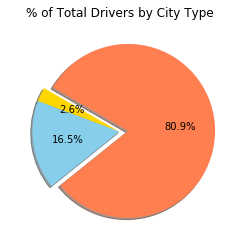

In [39]:
# Calculate Driver Percents
driver_group = city_df.groupby(['type'])
driver_sum = driver_group['driver_count'].sum()

# Build Pie Charts
labels = ["Rural", "Urban", "Suburban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(driver_sum, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("..\..\..\..\..\GitHub\matplotlib-homework\%ofTotalDriversbyCityType.png")

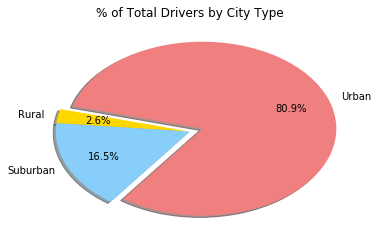

In [6]:
# Show Figure
plt.show()